## Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Gráficos

A escala logarítmica foi usada nestes gráficos para permitir a visualização clara dos tempos de execução muito diferentes entre C e Python. Como os valores variam em várias ordens de grandeza, a escala log amplia os menores e comprime os maiores, facilitando a comparação entre todas as categorias de tamanho de entrada.

## Tempo Médio de Execução

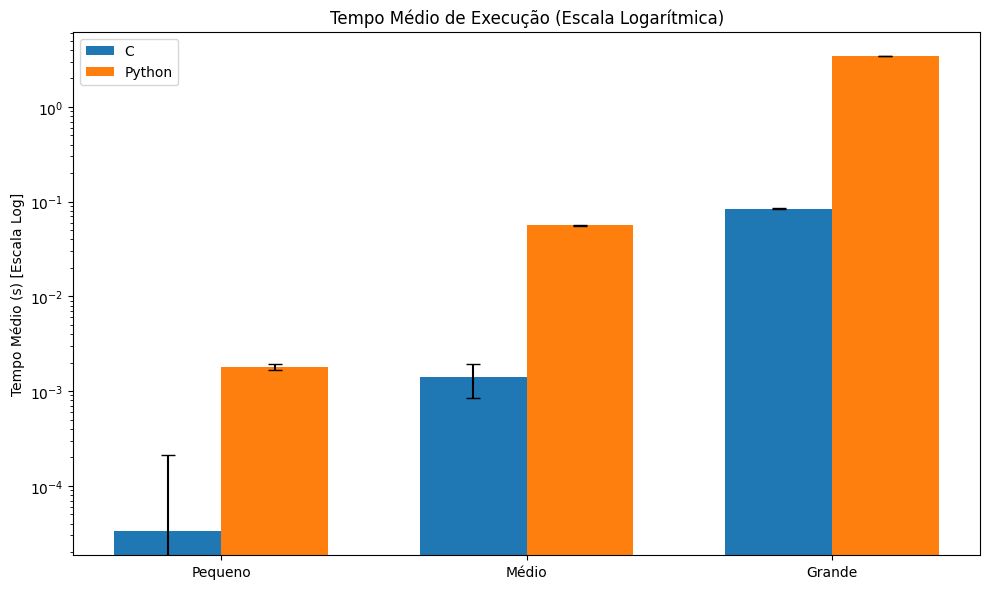

In [ ]:
dados = {
    'Tamanho': ['Pequeno', 'Médio', 'Grande'],
    'C - Média': [0.000033, 0.001400, 0.084600],
    'C - Desvio': [0.000180, 0.000554, 0.000800],
    'Python - Média': [0.001791, 0.056085, 3.460025],
    'Python - Desvio': [0.000140, 0.000935, 0.016791]
}

df = pd.DataFrame(dados)

fig, ax = plt.subplots(figsize=(10, 6))
largura = 0.35
x = np.arange(len(df['Tamanho']))

ax.bar(x - largura/2, df['C - Média'], largura, label='C',
       yerr=df['C - Desvio'], capsize=5)
ax.bar(x + largura/2, df['Python - Média'], largura, label='Python',
       yerr=df['Python - Desvio'], capsize=5)

ax.set_ylabel('Tempo Médio (s) [Escala Log]')
ax.set_yscale('log')
ax.set_title('Tempo Médio de Execução (Escala Logarítmica)')
ax.set_xticks(x)
ax.set_xticklabels(df['Tamanho'])
ax.legend()

plt.tight_layout()
plt.show()

## Fator de Lentidão

Text(0.5, 1.0, 'Quão Mais Lento é Python em Relação ao C')

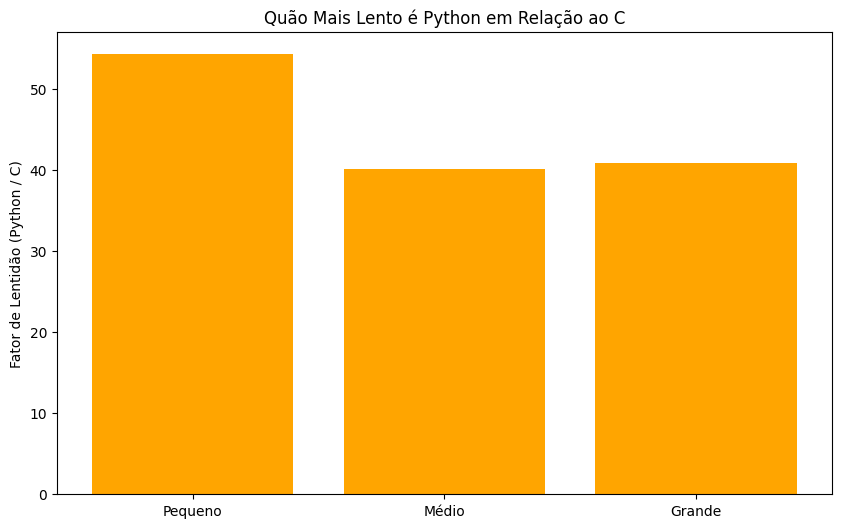

In [ ]:
velocidade_relativa = df['Python - Média'] / df['C - Média']
fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.bar(df['Tamanho'], velocidade_relativa, color='orange')
ax4.set_ylabel('Fator de Lentidão (Python / C)')
ax4.set_title('Quão Mais Lento é Python em Relação ao C')

## Complexidade Teórica

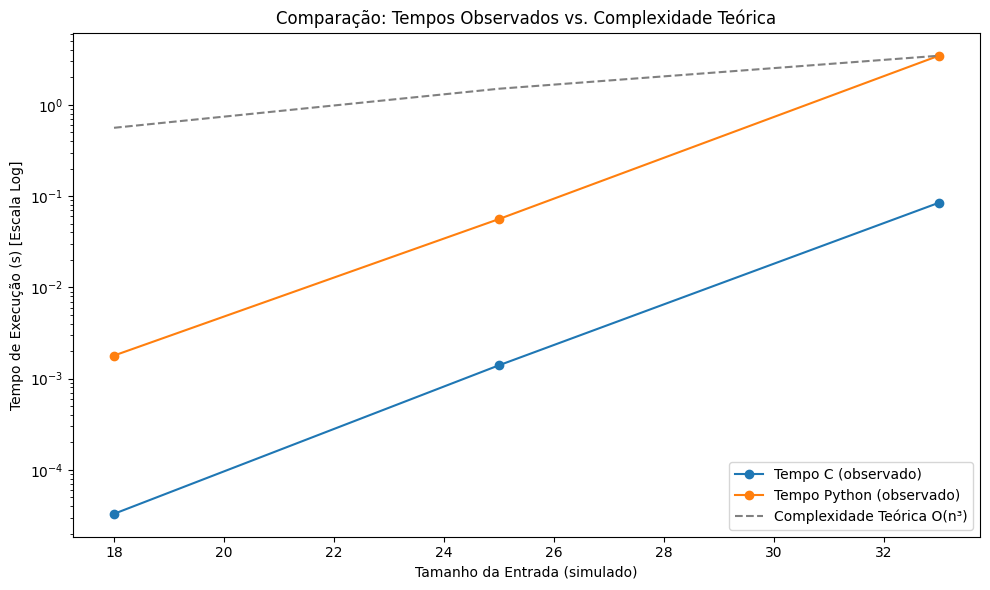

In [ ]:
input_sizes = [18, 25, 33]

tempo_c = [0.000033, 0.001400, 0.084600]
tempo_python = [0.001791, 0.056085, 3.460025]

complexidade_teorica = [n**3 for n in input_sizes]
complexidade_normalizada = [x / max(complexidade_teorica) * max(tempo_python) for x in complexidade_teorica]

plt.figure(figsize=(10, 6))

plt.plot(input_sizes, tempo_c, marker='o', label='Tempo C (observado)')
plt.plot(input_sizes, tempo_python, marker='o', label='Tempo Python (observado)')
plt.plot(input_sizes, complexidade_normalizada, linestyle='--', color='gray', label='Complexidade Teórica O(n³)')

plt.yscale('log')
plt.xlabel('Tamanho da Entrada (simulado)')
plt.ylabel('Tempo de Execução (s) [Escala Log]')
plt.title('Comparação: Tempos Observados vs. Complexidade Teórica')
plt.legend()
plt.tight_layout()
plt.show()

## Comparação de Eficiência

Text(0.5, 1.0, 'Comparação de Eficiência: C vs Python')

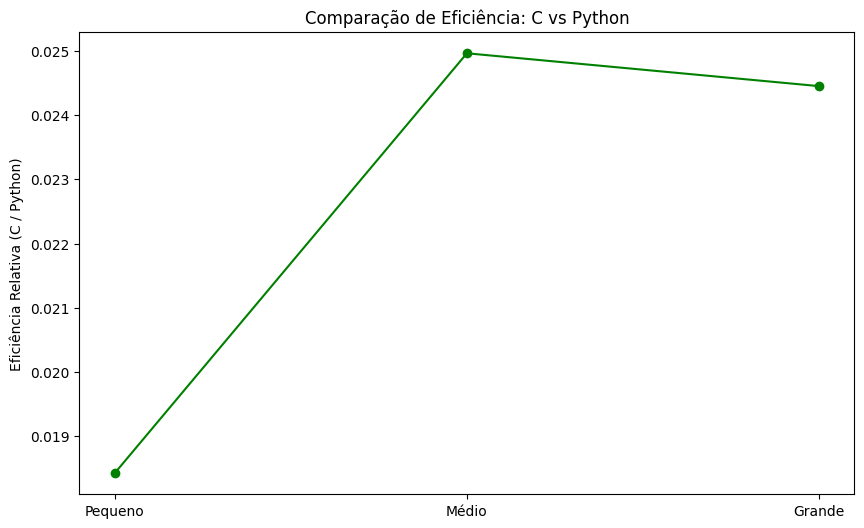

In [ ]:
eficiencia = df['C - Média'] / df['Python - Média']

plt.figure(figsize=(10, 6))
plt.plot(df['Tamanho'], eficiencia, marker='o', color='green')
plt.ylabel('Eficiência Relativa (C / Python)')
plt.title('Comparação de Eficiência: C vs Python')

# Tabela Comparativa

In [ ]:
dados = {
    'Tamanho': ['Pequeno', 'Médio', 'Grande'],
    'Tempo C (s)': [0.000033, 0.001400, 0.084600],
    'Tempo Python (s)': [0.001791, 0.056085, 3.460025],
}

df = pd.DataFrame(dados)

df['Fator de Lentidão (Python/C)'] = df['Tempo Python (s)'] / df['Tempo C (s)']

df['Tempo C (s)'] = df['Tempo C (s)'].map('{:.10f}'.format)
df['Tempo Python (s)'] = df['Tempo Python (s)'].map('{:.6f}'.format)
df['Fator de Lentidão (Python/C)'] = df['Fator de Lentidão (Python/C)'].map('{:.2f}×'.format)

df

,Tamanho,Tempo C (s),Tempo Python (s),Fator de Lentidão (Python/C)
0,Pequeno,0.0000330000,0.001791,54.27×
1,Médio,0.0014000000,0.056085,40.06×
2,Grande,0.0846000000,3.460025,40.90×
